In [1]:
import pandas as pd
import numpy as np

In [2]:
corr = {
    'RealE_SUM':
        ['RealEc_SUM', # Sum of Consumed Energy 
        'RealEc_L1', # Real Energy Consumed L1
        'RealEc_L2', # Real Energy Consumed L2
        'RealEc_L3', # Real Energy Consumed L3
        'RealE_SUM', # Sum of Real Energy 
        'RealE_L2', # Real Energy L2
        'RealE_L3', # Real Energy L3
        'RealE_L1', # Real Energy L1
        'AE_SUM', # Apparent Energy Sum
        'AE_L1', # Apparent Energy L1
        'AE_L2', # Apparent Energy L2
        'AE_L3', # Apparent Energy L3
        'ReacE_L1']
} #Reactive Energy L1

In [3]:
df = pd.read_csv("data/mongo_data.csv", index_col='ts')
df = df.drop('Unnamed: 0', 1)
df.index = pd.to_datetime(df.index)


C:\Users\pedro\AppData\Local\Temp\ipykernel_61248\2016917706.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


In [4]:
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

df = df.loc[:,np.invert(unique_cols(df))]
df = df[corr['RealE_SUM']]
print(df.shape)
df.tail()

(1928755, 13)


,RealEc_SUM,RealEc_L1,RealEc_L2,RealEc_L3,RealE_SUM,RealE_L2,RealE_L3,RealE_L1,AE_SUM,AE_L1,AE_L2,AE_L3,ReacE_L1
ts,,,,,,,,,,,,,
2022-03-16 11:46:25.931837314+00:00,131879832,44933936,43492684,43453100,131879656,43492636,43453052,44933888,149766128,50667360,49394204,49704484,9075333.0
2022-03-16 11:46:27.213046140+00:00,131879880,44933952,43492700,43453120,131879704,43492652,43453072,44933904,149766176,50667380,49394220,49704504,9075336.0
2022-03-16 11:46:28.499715032+00:00,131879920,44933968,43492712,43453132,131879744,43492664,43453084,44933920,149766224,50667396,49394236,49704520,9075338.0
2022-03-16 11:46:29.814130324+00:00,131879976,44933988,43492732,43453148,131879800,43492684,43453100,44933936,149766288,50667416,49394256,49704536,9075342.0
2022-03-16 11:46:31.116579462+00:00,131880016,44934000,43492744,43453164,131879840,43492696,43453116,44933952,149766336,50667432,49394272,49704552,9075345.0


In [5]:
# Average window
df_2 = df.groupby(np.arange(len(df))//60).mean()
print(df_2.shape)
df_2.head()

(32146, 13)


,RealEc_SUM,RealEc_L1,RealEc_L2,RealEc_L3,RealE_SUM,RealE_L2,RealE_L3,RealE_L1,AE_SUM,AE_L1,AE_L2,AE_L3,ReacE_L1
0,7.609013e+07,2.587859e+07,2.517477e+07,2.503666e+07,7.608996e+07,2.517472e+07,2.503662e+07,2.587854e+07,8.659935e+07,2.926923e+07,2.864164e+07,2.868840e+07,5.342684e+06
1,7.609540e+07,2.588038e+07,2.517653e+07,2.503839e+07,7.609522e+07,2.517648e+07,2.503834e+07,2.588033e+07,8.660518e+07,2.927121e+07,2.864359e+07,2.869031e+07,5.342998e+06
2,7.609825e+07,2.588134e+07,2.517748e+07,2.503932e+07,7.609808e+07,2.517744e+07,2.503927e+07,2.588129e+07,8.660835e+07,2.927228e+07,2.864465e+07,2.869135e+07,5.343170e+06
3,7.610111e+07,2.588231e+07,2.517844e+07,2.504025e+07,7.610093e+07,2.517839e+07,2.504020e+07,2.588226e+07,8.661152e+07,2.927335e+07,2.864571e+07,2.869239e+07,5.343346e+06
4,7.610396e+07,2.588327e+07,2.517940e+07,2.504118e+07,7.610379e+07,2.517936e+07,2.504113e+07,2.588322e+07,8.661468e+07,2.927441e+07,2.864677e+07,2.869342e+07,5.343521e+06


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
d = scaler.fit_transform(df_2)
scaled_df = pd.DataFrame(d, columns=df_2.columns, index=df_2.index)
scaled_df.head()

,RealEc_SUM,RealEc_L1,RealEc_L2,RealEc_L3,RealE_SUM,RealE_L2,RealE_L3,RealE_L1,AE_SUM,AE_L1,AE_L2,AE_L3,ReacE_L1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000094,0.000094,0.000096,0.000094,0.000094,0.000096,0.000094,0.000094,0.000092,0.000092,0.000094,0.000091,0.000084
2,0.000146,0.000144,0.000148,0.000144,0.000146,0.000148,0.000144,0.000144,0.000143,0.000142,0.000145,0.000141,0.000130
3,0.000197,0.000195,0.000201,0.000195,0.000197,0.000201,0.000195,0.000195,0.000193,0.000192,0.000196,0.000190,0.000177
4,0.000248,0.000245,0.000253,0.000245,0.000248,0.000253,0.000245,0.000245,0.000243,0.000242,0.000247,0.000239,0.000224


<AxesSubplot:>

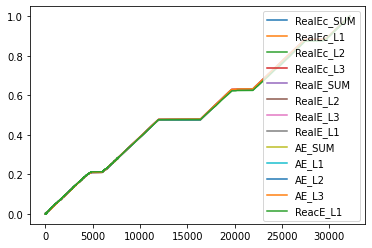

In [7]:
scaled_df.plot()

In [8]:
# convert series to supervised learning
def create_supervised_dataset(df, target, feats, n_in=1, n_out=1):
    cols, names = list(), list()
    n_vars = len(feats)
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df[feats].shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[target].shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(1)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(1)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg.dropna(inplace=True)
    return agg.values

In [10]:
from sklearn.linear_model import LinearRegression

# create network
def create_model(features, timesteps=1):
    model = LinearRegression()
    
    return model

In [17]:
from sklearn.linear_model import LinearRegression

history_window =  30 # 8*15secs = 120secs
prediction_window = 1 #predict 15 secs
for k in corr:
    values = create_supervised_dataset(scaled_df, k, corr[k], n_in=history_window, n_out=prediction_window)
    len_values = values.shape[0]
    # split into train and test sets 
    n_train_seconds = int(0.7*len_values) #70% dos valores
    n_cv_seconds =  int(0.9*len_values) #20% dos valores
    train = values[:n_train_seconds, :]
    cv = values[n_train_seconds:n_cv_seconds, :]
    
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1:]
    train_y = np.reshape(train_y, newshape=train_y.shape[0])
    print(train_X.shape, train_y.shape)
    model = LinearRegression().fit(train_X, train_y)
    r_sq = model.score(train_X, train_y)
    print('coefficient of determination:', r_sq)

    #Test for the day after
    print("Starting Test", k)
    n_test_seconds =  int(0.1*len_values) #10% dos valores
    test = values[-n_test_seconds:, :]

    test_X, test_y = test[:, :-1], test[:, -1:]
    test_y = np.reshape(test_y, newshape=test_y.shape[0])
    # make a prediction
    yhat = model.predict(test_X)
    prediction_results = pd.DataFrame(yhat)
    prediction_results.to_csv('results/Spec_Norm_LSTM'+k+'predict.csv')

(22481, 390) (22481,)
coefficient of determination: 0.9999994225573128
Starting Test RealE_SUM
